In [114]:
! pip install pandas numpy matplotlib seaborn scipy

In [115]:
import pandas as pd

In [116]:
df = pd.read_csv("D:/Bank Loan Risk & Performance Analysis/Bank_loan_data.csv", encoding = "latin1")

In [117]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [118]:
print(f"No. of rows: {df.shape[0]} \nNo. of Columns: {df.shape[1]}")

No. of rows: 38576 
No. of Columns: 24


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [120]:
# Check if null values is present or not
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [121]:
# Check for a duplicate values
df.duplicated().sum()

np.int64(0)

In [122]:
#check for duplicated values for customerID
df['id'].duplicated().sum()

np.int64(0)

Data Cleaning

In [123]:
# change the datetype
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'],format='%d-%m-%Y')
df['issue_date'] = pd.to_datetime(df['issue_date'],format='%d-%m-%Y')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'],format='%d-%m-%Y')
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'],format='%d-%m-%Y')


In [124]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [125]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [126]:
# use describe() for specific columns
df[['annual_income', 'dti', 'installment','int_rate','loan_amount','total_acc','total_payment']].describe()

,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [127]:
# df['emp_title'].fillna("Unknown",inplace=True)

Exploratory Data Analysis(EDA)
Key Performance Indicators(KPIs)


In [128]:
# Total loan Applications
print(f"Total loan Application: {df['id'].count()}")

Total loan Application: 38576


<!-- Month to Date(MTD) Loan Applications -->

In [129]:
latest_issue_date= df['issue_date'].max()
latest_year= latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

print(f"Month-to-Date (MTD) Loan Applications(for {latest_issue_date.strftime('%B %Y')}) : {mtd_data['id'].count()} ")

Month-to-Date (MTD) Loan Applications(for December 2021) : 4314 


<!-- Total funded amount -->

In [130]:
Amount=df['loan_amount'].sum() / 1000000

print("Total Funded Amount: $ {:.2f}M".format(Amount) )

Total Funded Amount: $ 435.76M


<!-- Month to Date Funded Amount -->

In [131]:
latest_issue_date= df['issue_date'].max()
latest_year= latest_issue_date.year
latest_month= latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

Amount=mtd_data['loan_amount'].sum() / 1000000

print("Month-to-Date (MTD) Funded Amount: $ {:.2f}M".format(Amount))

Month-to-Date (MTD) Funded Amount: $ 53.98M


<!-- Total Amount Received -->

In [132]:
Amount = df['total_payment'].sum() / 1000000
print("Total Amount Received: $ {:.2f}M".format(Amount) )

Total Amount Received: $ 473.07M


<!-- Month to Date(MTD) Amount Received -->

In [133]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

Amount=mtd_data['total_payment'].sum() / 1000000

print("Month-to-Date (MTD) Amount Received: $ {:.2f}M".format(Amount))

Month-to-Date (MTD) Amount Received: $ 58.07M


<!-- Average Interest Rate -->

In [134]:
Average=df['int_rate'].mean() * 100

print("Average Interest Rate: {:.2f}M".format(Average) )

Average Interest Rate: 12.05M


<!-- Average Debt-to-Income Ratio(DTI) -->

In [135]:
Average=df['dti'].mean() * 100

print("Average Debt-to-Income Ratio (DTI): {:.2f}M".format(Average) )

Average Debt-to-Income Ratio (DTI): 13.33M


<!-- Good Loan VS Bad Loan KPI's -->

In [136]:
# GOOD LOAN
goodloan= df[df["loan_status"].isin(["Fully Paid","Current"]) ]

total_loan_aplication= df["id"].count()
good_loan_application= goodloan['id'].count()

loan_funded_amount= goodloan['loan_amount'].sum()/ 1000000
loan_total_received= goodloan['total_payment'].sum() / 1000000
loan_percentage= (good_loan_application / total_loan_aplication) * 100

print("Good Loan Applications:",good_loan_application)
print("Good Loan Funded Amount: $ {:.2f}M".format(loan_funded_amount))
print("Good Loan Total Received Amount: $ {:.2f}M ".format(loan_total_received))
print("Good Loan Applications Percentage: {:.2f}%".format(loan_percentage))

print("Profit: $ {:.2f}M".format(loan_total_received-loan_funded_amount))

Good Loan Applications: 33243
Good Loan Funded Amount: $ 370.22M
Good Loan Total Received Amount: $ 435.79M 
Good Loan Applications Percentage: 86.18%
Profit: $ 65.56M


In [137]:
# BAD LOAN
badloan= df[df["loan_status"].isin(["Charged Off"]) ]

total_loan_aplication= df["id"].count()
bad_loan_application= badloan['id'].count()

loan_funded_amount= badloan['loan_amount'].sum()/ 1000000
loan_total_received= badloan['total_payment'].sum() / 1000000
loan_percentage= (bad_loan_application / total_loan_aplication) * 100

print("Bad Loan Applications:",bad_loan_application)
print("Bad Loan Funded Amount: $ {:.2f}M".format(loan_funded_amount))
print("Bad Loan Total Received Amount: $ {:.2f}M ".format(loan_total_received))
print("Bad Loan Applications Percentage: {:.2f}%".format(loan_percentage))

print("Loss: $ {:.2f}M".format(loan_funded_amount-loan_total_received))

Bad Loan Applications: 5333
Bad Loan Funded Amount: $ 65.53M
Bad Loan Total Received Amount: $ 37.28M 
Bad Loan Applications Percentage: 13.82%
Loss: $ 28.25M


<!-- Charts -->

In [138]:
! pip install matplotlib seaborn

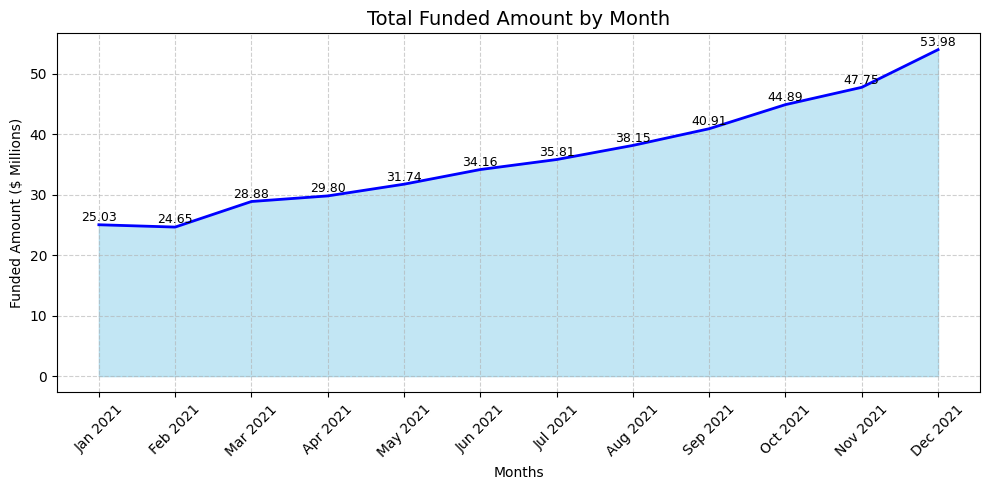

In [139]:
# Monthly Trends By Issue Date For Total Funded Amount
import matplotlib.pyplot as plt

monthly_funded= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)["loan_amount"]
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='skyblue',alpha=0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color='blue',linewidth=2)

for i ,row in monthly_funded.iterrows():
    plt.text(i ,row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title("Total Funded Amount by Month",fontsize=14)
plt.xlabel("Months")
plt.ylabel("Funded Amount ($ Millions)")
plt.xticks(ticks= range(len(monthly_funded)), labels= monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<!-- Monthly trends by issue Date for total amount Received -->

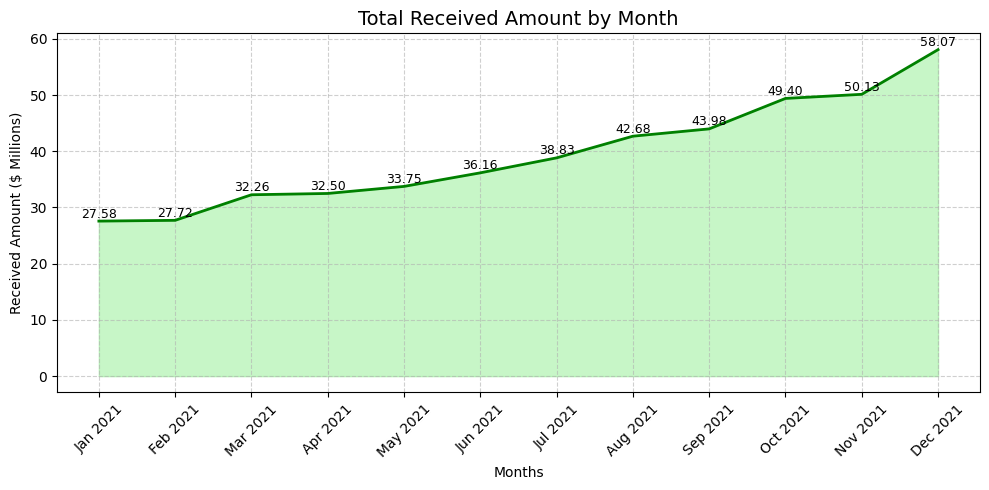

In [140]:
monthly_received= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)["total_payment"]
    .sum()
    .div(1000000)
    .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'],color='lightgreen',alpha=0.5)
plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color='green',linewidth=2)

for i ,row in monthly_received.iterrows():
    plt.text(i ,row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title("Total Received Amount by Month",fontsize=14)
plt.xlabel("Months")
plt.ylabel("Received Amount ($ Millions)")
plt.xticks(ticks= range(len(monthly_received)), labels= monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<!-- Monthly trends by issue date for total loan application -->

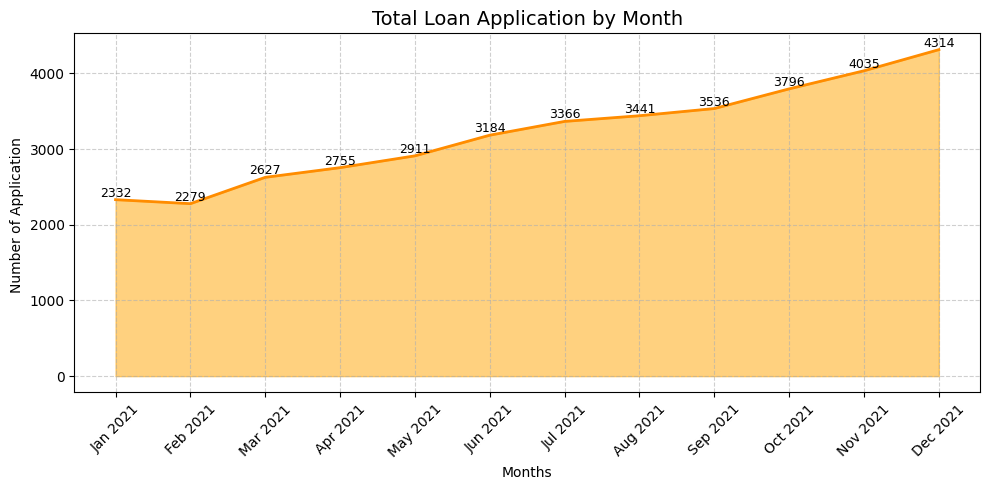

In [141]:
monthly_application= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)["id"]
    .count()
    .reset_index(name='loan_application_count')
)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_application['month_name'],monthly_application['loan_application_count'],color='orange',alpha=0.5)
plt.plot(monthly_application['month_name'],monthly_application['loan_application_count'],color='darkorange',linewidth=2)

for i ,row in monthly_application.iterrows():
    plt.text(i ,row['loan_application_count'] , f"{row['loan_application_count']}",
            ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title("Total Loan Application by Month",fontsize=14)
plt.xlabel("Months")
plt.ylabel("Number of Application ")
plt.xticks(ticks= range(len(monthly_application)), labels= monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<!-- Overall Monthy Trend conclusion -->

In [142]:
# Regional analysis by state for total funded amount

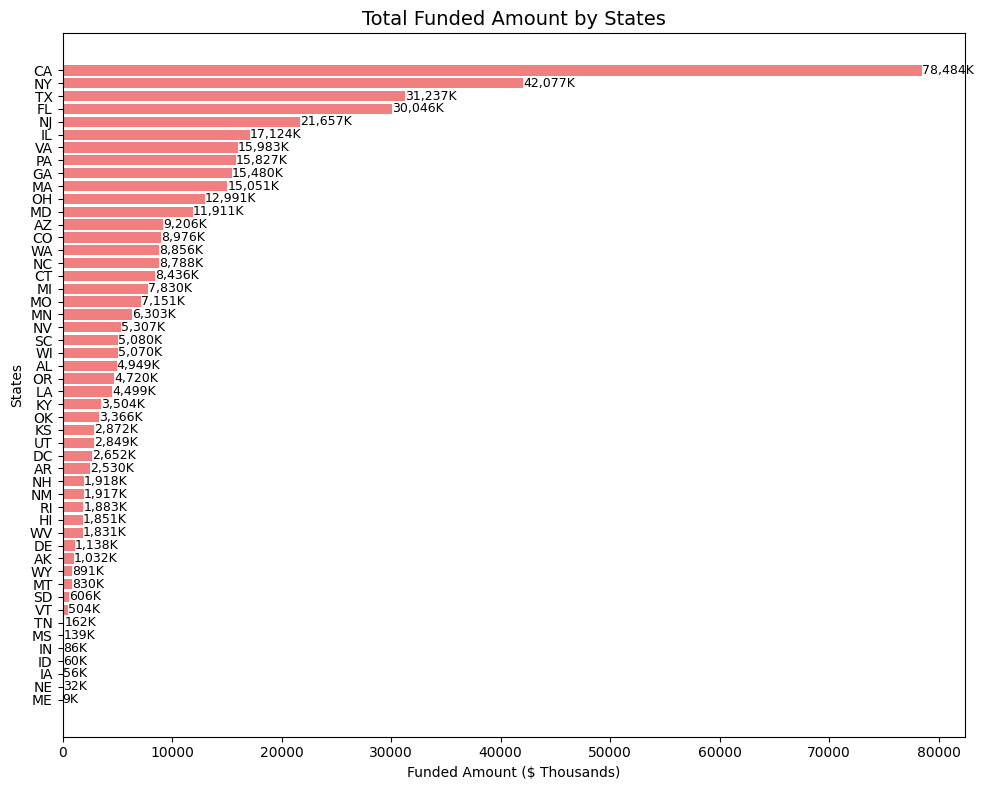

In [143]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending= True) / 1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding.index,state_funding.values,color='lightcoral')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Funded Amount by States",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("States")
plt.tight_layout()
plt.show()

<!-- Regional Analysis by state for total amount received -->

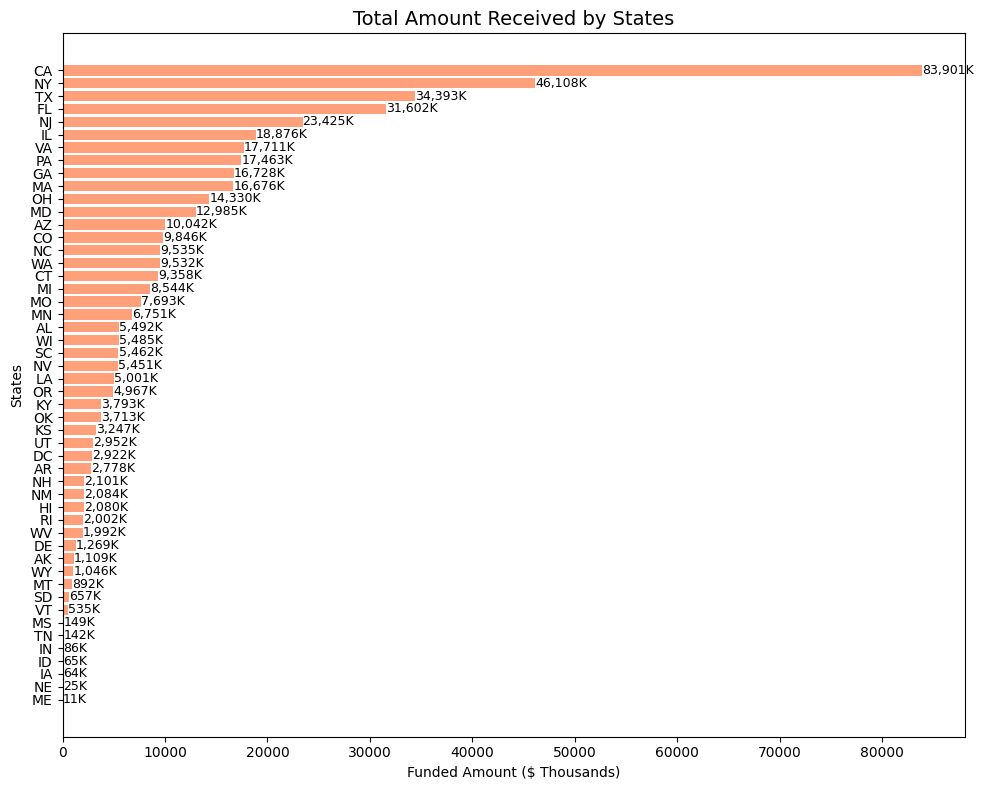

In [144]:
state_funding = df.groupby('address_state')['total_payment'].sum().sort_values(ascending= True) / 1000

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding.index,state_funding.values,color='lightsalmon')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Amount Received by States",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("States")
plt.tight_layout()
plt.show()

In [145]:
# Regional analysis by state for total loan application

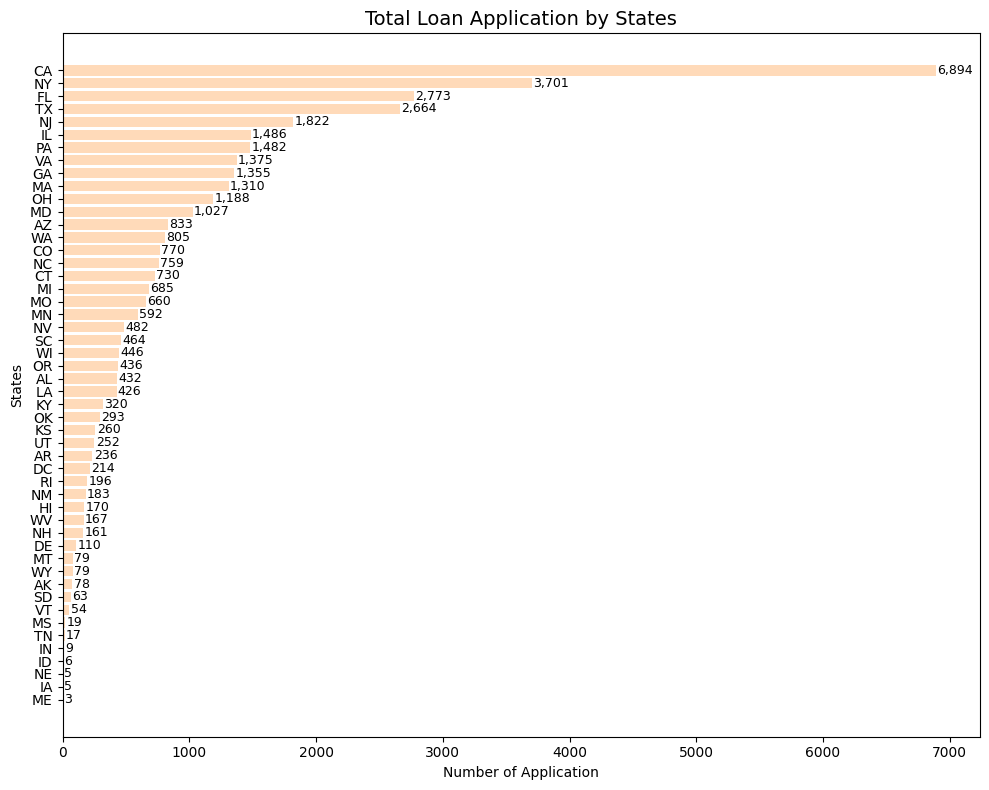

In [146]:
state_funding = df.groupby('address_state')['id'].count().sort_values(ascending= True)

plt.figure(figsize=(10,8))
bars= plt.barh(state_funding.index,state_funding.values,color='peachpuff')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}" , va='center', fontsize=9)

plt.title("Total Loan Application by States",fontsize=14)
plt.xlabel("Number of Application")
plt.ylabel("States")
plt.tight_layout()
plt.show()

<!-- Overall regional Conclusion (market concentration) -->

In [147]:
# Loan term analysis by total funded amount

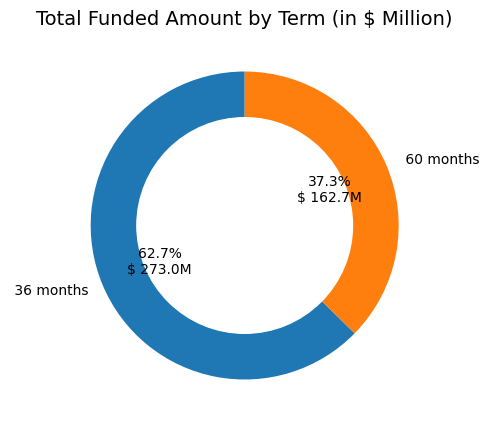

In [148]:
team_funding= df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    team_funding, labels=team_funding.index,
    autopct= lambda p: f"{p:.1f}%\n$ {p*sum(team_funding)/100:.1f}M",
    startangle=90, wedgeprops= {'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Million)",fontsize=14)
plt.show()

In [149]:
# Loan ter analysis by totla amount received

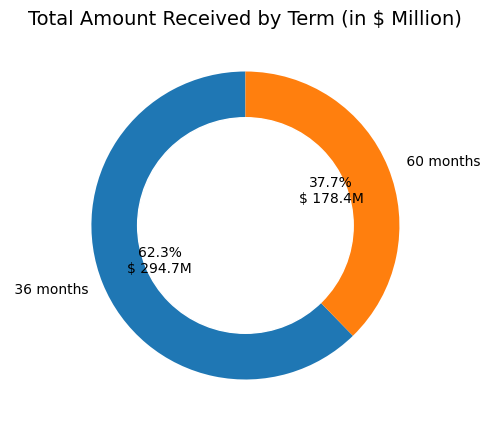

In [150]:
team_funding= df.groupby('term')['total_payment'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    team_funding, labels=team_funding.index,
    autopct= lambda p: f"{p:.1f}%\n$ {p*sum(team_funding)/100:.1f}M",
    startangle=90, wedgeprops= {'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Amount Received by Term (in $ Million)",fontsize=14)
plt.show()

In [151]:
# Loan term analysis by total loan application

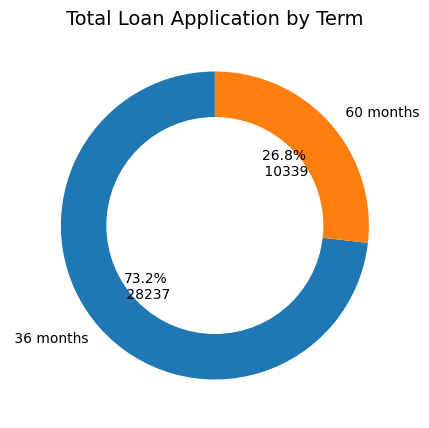

In [152]:
team_funding= df.groupby('term')['id'].count()

plt.figure(figsize=(5,5))
plt.pie(
    team_funding, labels=team_funding.index,
    autopct= lambda p: f"{p:.1f}%\n {round(p*sum(team_funding)/100)}",
    startangle=90, wedgeprops= {'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Loan Application by Term",fontsize=14)
plt.show()

<!-- Overall loan term conclusion(strategy Focus) -->

In [153]:
# Employee length analysis by total funded amount

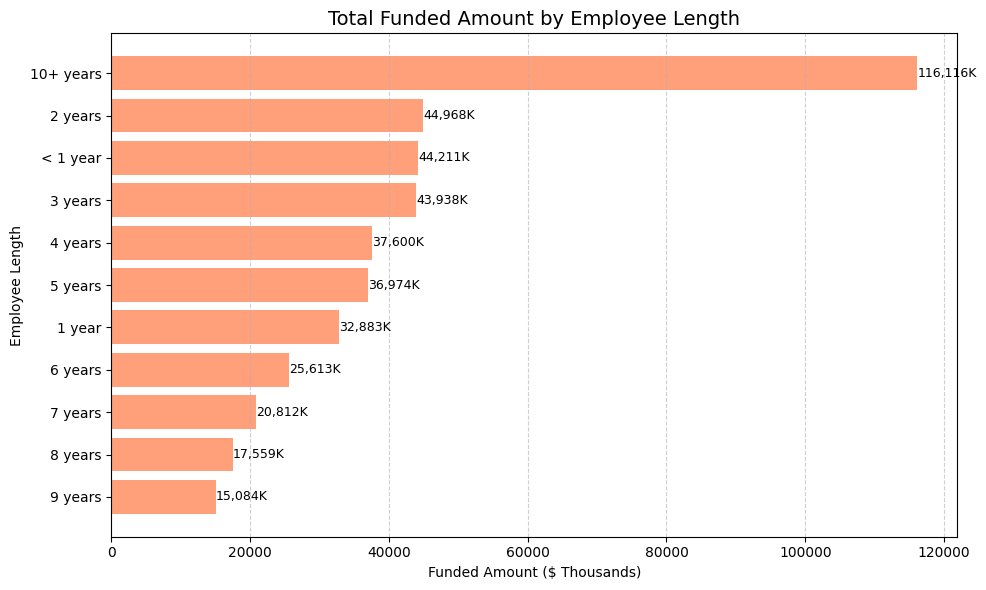

In [154]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding.index,emp_funding.values,color='lightsalmon')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Funded Amount by Employee Length",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Employee Length")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

In [155]:
#Employee Length Analysis By Total Amount Received

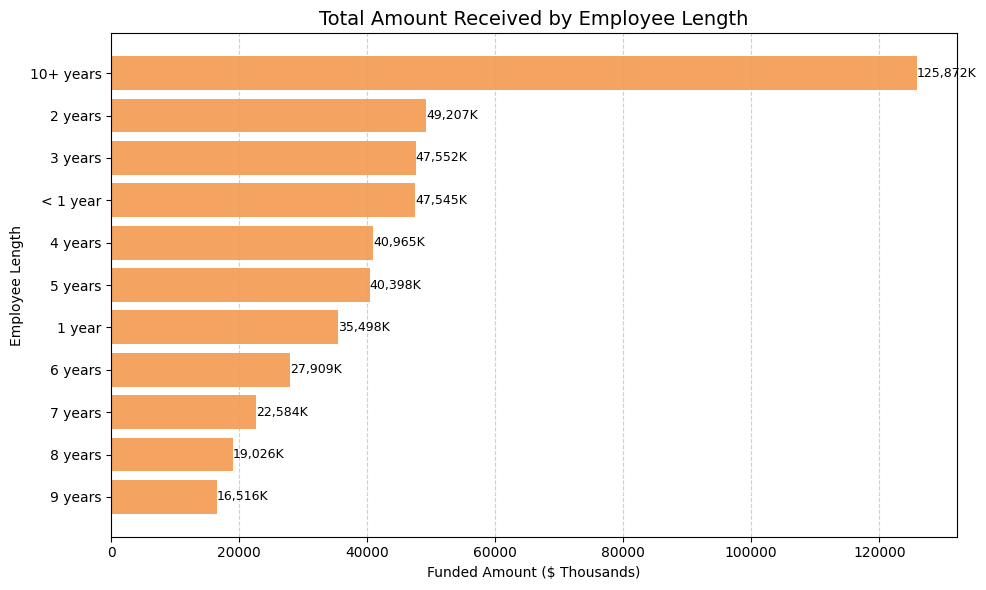

In [156]:
emp_funding = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1000

plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding.index,emp_funding.values,color='sandybrown')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}K" , va='center', fontsize=9)

plt.title("Total Amount Received by Employee Length",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Employee Length")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

In [157]:
# Employee Length Analysis By Total Loan Application

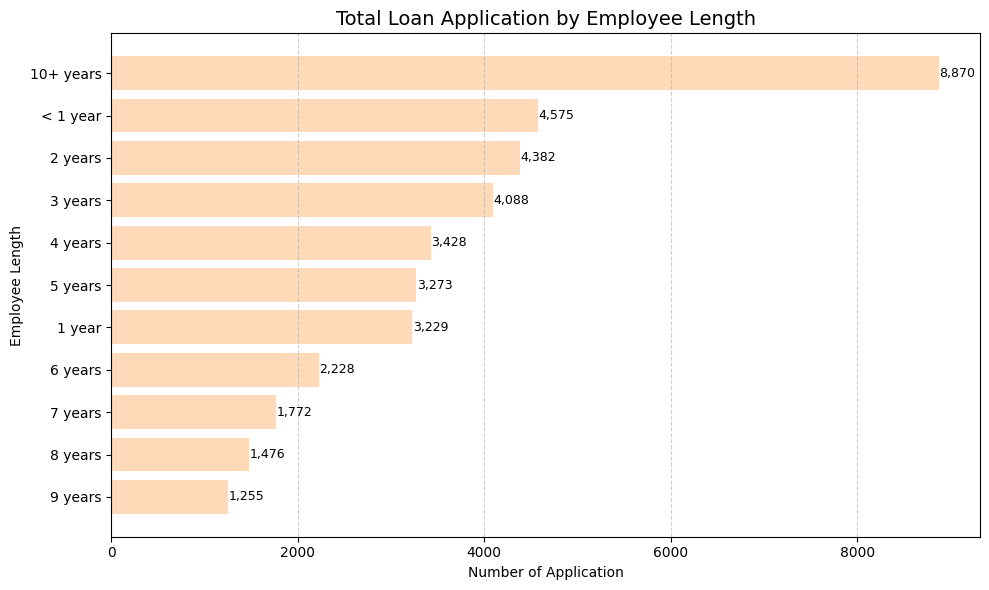

In [158]:
emp_funding = df.groupby('emp_length')['id'].count().sort_values(ascending= True)

plt.figure(figsize=(10,6))
bars= plt.barh(emp_funding.index,emp_funding.values,color='peachpuff')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}" , va='center', fontsize=9)

plt.title("Total Loan Application by Employee Length",fontsize=14)
plt.xlabel("Number of Application")
plt.ylabel("Employee Length")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

In [159]:
# Overall Employee Length Conclusion (Stability and Risk)

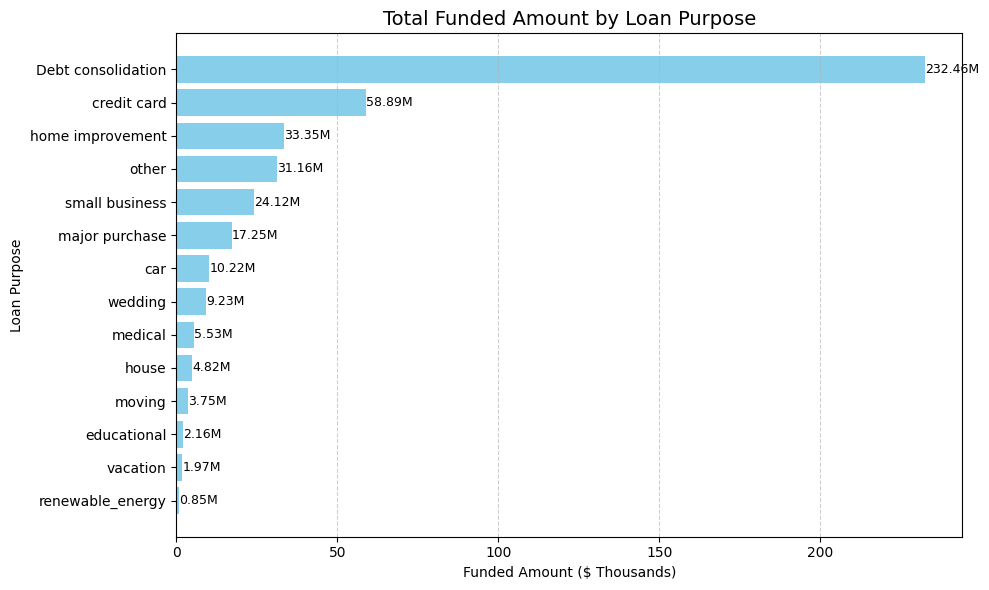

In [160]:
# Loan Purpose Breakdown By Total Funded Amount
purpose_funding = df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000

plt.figure(figsize=(10,6))
bars= plt.barh(purpose_funding.index,purpose_funding.values,color='skyblue')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
              f"{width:,.2f}M" , va='center', fontsize=9)

plt.title("Total Funded Amount by Loan Purpose",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Loan Purpose")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

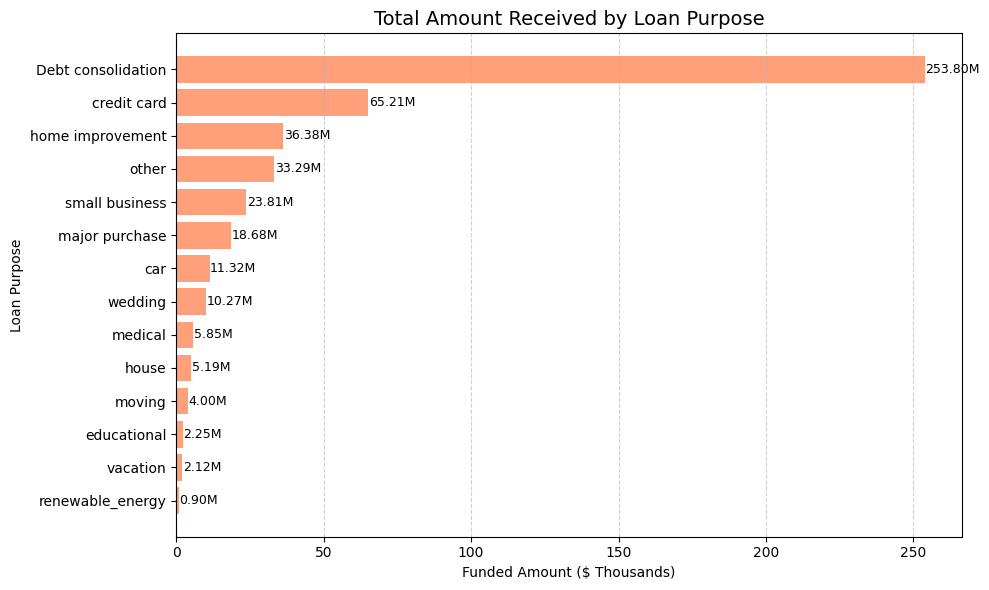

In [161]:
# Loan Purpose Breakdown By Total Amount Received
purpose_funding = df.groupby('purpose')['total_payment'].sum().sort_values() / 1000000

plt.figure(figsize=(10,6))
bars= plt.barh(purpose_funding.index,purpose_funding.values,color='lightsalmon')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
              f"{width:,.2f}M" , va='center', fontsize=9)

plt.title("Total Amount Received by Loan Purpose",fontsize=14)
plt.xlabel("Funded Amount ($ Thousands)")
plt.ylabel("Loan Purpose")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

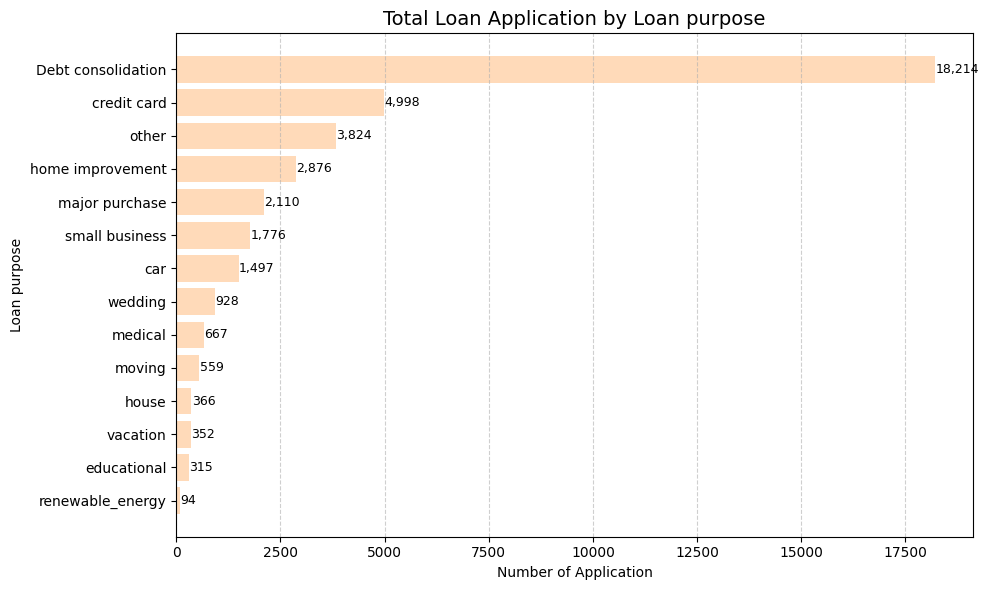

In [162]:
# Loan Purpose Breakdown By Total Loan Application
purpose_funding = df.groupby('purpose')['id'].count().sort_values(ascending= True)

plt.figure(figsize=(10,6))
bars= plt.barh(purpose_funding.index,purpose_funding.values,color='peachpuff')

for bar in bars:
    width=bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
              f"{width:,.0f}" , va='center', fontsize=9)

plt.title("Total Loan Application by Loan purpose",fontsize=14)
plt.xlabel("Number of Application")
plt.ylabel("Loan purpose")
plt.grid(axis='x', linestyle= '--', alpha=0.6)
plt.tight_layout()
plt.show()

In [163]:
# Overall Loan Purpose Conclusion (Business Strategy)

In [168]:
!pip install --upgrade nbformat ipython notebook jupyter


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached fastjsonschema-2.21.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached jupyter_server-2.17.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab_server-2.28.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached websocket_client-1.9.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_lsp-2.3.0-py3-

In [170]:
# Home Ownership Analysis By Total Funded Amount
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"


home_funding= df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions']= home_funding['loan_amount'] / 1000000

fig= px.treemap(
    home_funding, path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='blues',
    title="Total Funded Amount by Home Ownership (in $ Million)"
)
fig.show()


In [171]:
# Home Ownership Analysis By Total Amount Received
home_funding= df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_funding['amount_received_millions']= home_funding['total_payment'] / 1000000

fig= px.treemap(
    home_funding, path=['home_ownership'],
    values='amount_received_millions',
    color='amount_received_millions',
    color_continuous_scale='RdBu',
    title="Total Amount Received by Home Ownership (in $ Million)"
)

fig.show()
